In [75]:
import pandas as pd
import numpy as np
import json
import math
import sys

In [76]:
df=pd.read_csv("C:\\Users\\giuli\\project_w_EXP\\man-shoes\\Datafiniti_Mens_Shoe_Prices.csv", error_bad_lines=False)

b'Skipping line 251: expected 48 fields, saw 49\nSkipping line 444: expected 48 fields, saw 50\nSkipping line 847: expected 48 fields, saw 49\nSkipping line 848: expected 48 fields, saw 49\nSkipping line 1018: expected 48 fields, saw 49\nSkipping line 1575: expected 48 fields, saw 51\nSkipping line 2133: expected 48 fields, saw 49\nSkipping line 2922: expected 48 fields, saw 51\nSkipping line 3777: expected 48 fields, saw 51\nSkipping line 4057: expected 48 fields, saw 49\nSkipping line 4239: expected 48 fields, saw 49\nSkipping line 4240: expected 48 fields, saw 49\nSkipping line 4384: expected 48 fields, saw 49\nSkipping line 4385: expected 48 fields, saw 49\nSkipping line 5388: expected 48 fields, saw 49\nSkipping line 5480: expected 48 fields, saw 49\nSkipping line 5481: expected 48 fields, saw 49\nSkipping line 5907: expected 48 fields, saw 50\nSkipping line 5908: expected 48 fields, saw 50\nSkipping line 6600: expected 48 fields, saw 49\nSkipping line 6601: expected 48 fields, sa

In [77]:
df=df[df['prices.currency']!='USD']

,id,asins,brand,categories,colors,count,dateAdded,dateUpdated,descriptions,dimension,...,prices.warranty,quantities,reviews,sizes,skus,sourceURLs,upc,vin,websiteIDs,weight
18,AVpfHssKilAPnD_xVXu5,NaN,Hao-bo,"Clothing, Shoes, Accessories,Bags, Briefcases,...",Brown,NaN,2016-05-08T17:59:26Z,2016-05-09T13:58:45Z,NaN,NaN,...,NaN,NaN,NaN,NaN,"[{""sourceURLs"":[""http://www.ebay.com.au/itm/Me...",http://www.ebay.com.au/itm/Mens-Faux-Leather-B...,7.135244e+11,NaN,NaN,NaN
35,AVpfIBrDilAPnD_xVevt,NaN,Maui Jim,"Clothing, Shoes, Accessories,Men's Sunglasses",BLACK,NaN,2016-02-14T11:26:06Z,2016-02-14T11:26:06Z,NaN,NaN,...,NaN,NaN,NaN,NaN,"[{""sourceURLs"":[""http://www.ebay.com.au/itm/Po...",http://www.ebay.com.au/itm/Polarized-Sunglasse...,NaN,NaN,NaN,NaN
41,AVpfAqU7LJeJML430ZHS,B0108EOKQW,NaN,"Athletic,Men,Shoes,Shoes & Handbags","Blue,Black",NaN,2015-11-16T02:54:29Z,2016-05-06T16:24:06Z,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,http://www.amazon.ca/SOFIAMORE-Shoes-Casual-Ca...,NaN,NaN,NaN,499 g
52,AVpfG1nE1cnluZ0-eDSf,B01327C8C0,Puentes Denver,"Clothing,Jewellery,Cufflinks & Shirt Accessori...",Multicolor,NaN,2016-03-30T17:19:34Z,2016-05-25T07:39:06Z,"[{""dateSeen"":[""2017-01-12T03:17:13Z""],""sourceU...",NaN,...,NaN,NaN,"[{""date"":""2015-09-18T00:00:00Z"",""dateAdded"":""2...",NaN,NaN,http://www.amazon.com/Pinch-Regular-Silver-Ton...,8.172480e+11,NaN,NaN,9 g
53,AVpfG1nE1cnluZ0-eDSf,B01327C8C0,Puentes Denver,"Clothing,Jewellery,Cufflinks & Shirt Accessori...",Multicolor,NaN,2016-03-30T17:19:34Z,2016-05-25T07:39:06Z,"[{""dateSeen"":[""2017-01-12T03:17:13Z""],""sourceU...",NaN,...,NaN,NaN,"[{""date"":""2015-09-18T00:00:00Z"",""dateAdded"":""2...",NaN,NaN,http://www.amazon.com/Pinch-Regular-Silver-Ton...,8.172480e+11,NaN,NaN,9 g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19178,AVpf0zvoilAPnD_xi9oF,B0158JC604,NaN,"Athletic,Men,Shoes,Shoes & Handbags,Fitness & ...",NaN,NaN,2015-11-16T03:12:05Z,2016-05-06T16:27:11Z,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,http://www.amazon.ca/ICEBUG-C6403-9I-07-5-Foot...,NaN,NaN,NaN,1.2 Kg
19179,AVpf0zvoilAPnD_xi9oF,B0158JC604,NaN,"Athletic,Men,Shoes,Shoes & Handbags,Fitness & ...",NaN,NaN,2015-11-16T03:12:05Z,2016-05-06T16:27:11Z,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,http://www.amazon.ca/ICEBUG-C6403-9I-07-5-Foot...,NaN,NaN,NaN,1.2 Kg
19236,AVpfr_U-1cnluZ0-pa1O,NaN,Serengeti,"Clothing, Shoes, Accessories,Men's Sunglasses",PEARL,NaN,2016-02-14T11:23:22Z,2016-02-14T11:23:22Z,NaN,NaN,...,NaN,NaN,NaN,NaN,"[{""sourceURLs"":[""http://www.ebay.com.au/itm/Ne...",http://www.ebay.com.au/itm/New-Serengeti-Veron...,7.264407e+11,NaN,NaN,NaN
19292,AVpf0oYoLJeJML43EYI5,B00T9JC8NA,HEAD,"Shoes & Handbags,Shoes,Men,Athletic,Tennis","WhiteGrayYellow,RedNeon Yellow,Red,BlueWhite",NaN,2015-12-02T01:04:06Z,2016-08-29T21:37:27Z,"[{""dateSeen"":[""2016-08-29T21:37:27Z""],""sourceU...",NaN,...,NaN,NaN,"[{""date"":""2015-11-30T00:00:00Z"",""dateAdded"":""2...",NaN,NaN,https://www.amazon.ca/HEAD-273215-110-Revolt-R...,NaN,NaN,NaN,1.4 Kg


__Una volta importato il db ed eliminate valute != dal dollaro, estraiamo i materiali__

In [78]:
def extract_material(features_json):
    # [{"key":"Material","value":["Suede"]},{"key":"Gender","value":["Men"]},{"key":"Color","value":["Beige"]},{"key":"Model","value":["M254TNN"]},{"key":"Manufacturer Part Number","value":["M254TNN"]},{"key":"Brand","value":["New Balance Numeric"]},{"key":"Age Group","value":["Adult"]}]    
    try:
        if (type(features_json) == float):
            return None
        
        if (type(features_json) != str):
            print( f"WARN not a string but a {type(features_json)} {features_json}" )
            return None
        
        features_json = features_json.replace("\\\\", "\\")
        kvs = json.loads(features_json)
        for kv in kvs:
            if(kv["key"] == "Material"):
                return kv["value"][0]
            
        return None
    except:
        err_type, err_value, err_traceback = sys.exc_info()
        print( f"WARN '{err_type}' '{err_value}' parsing {features_json}" )
        return None
    
df["material"] = df["features"].apply( extract_material )

__selezione delle colonne di interesse__

In [79]:
df=df[['brand','categories','prices.amountMin', 'prices.amountMax', 'material']]

__esploriamo le categorie ed estraimo in funzione solo quelle di interesse: Sneakers__

In [80]:
rows = df["categories"].unique()
#print(rows)
s = set()
for row in rows:
    #print("-- " + row)
    categories = row.split(",")
    for category in categories:
        ##print("---- " + category)
        s.add(category)

print(s)

{'Walking Shoes', "See more Chicago Bears Authentic Men's Team Logo Watch ...", 'See more Bostonian Wendell Mens Leather Oxfords Shoes 1...', 'Bags & Accessories', ' Accessories', 'Shells', "All Men's Shoes", "See more -Nike Flex Supreme TR 3 Men's Running Cross Tr...", 'Fishing Clothing', 'Coats', 'See more Under Armour Mens 13 Highlight MC Football Cle...', 'Sunglasses', 'Motorcycle and ATV', 'Bowling', "Men's Workwear Accessories", 'Down & Down Alternative', "See more Nike SB Hawthorne Camo Cargo Men's Shorts Sz 3...", 'Shoes Fan Shop', 'See more Black Green Combo Paisley Durag Headwrap Skull...', 'Sports Fan Shop', 'Sale', 'Anniversary Sale', 'Underwear', 'All Action Sports', "See more Reebok Royal Bb4500 Hi Men's Basketball Shoes ...", 'See more Levis Jeans 560 Comfort Loose Fit Tapered Leg ...', 'Soccer', 'See more Nike Victory Golf Polo 2015 Xx-large College N...', 'Extreme Sports', 'Necklaces', 'See more SAXX 9699 Mens Vibe Orange Striped Modern Fit ...', "See more Under Armour

In [81]:
def y(x):
    cat_def={'Fashion Sneakers', 'Tennis', 'Sneakers & Athletic Shoes', 'Nike Sneakers', "Men's Sneakers & Athletic Shoes", 'The Sneaker Project', 'Sneakers & Athletic', 'Sneakers'}
    p=''
    for i in cat_def:
        if i in x:
            p=p+i+', '
    return p[:-2]







In [82]:
def g(x):
    for i in x:
        return y(x)
    


In [83]:
df['categories']= df['categories'].apply(g)

In [84]:
df=df[df['categories']!='']

__convertiamo i prezzi in tipo float e creiamo la colonna prezzo medio__

In [85]:
df["prices.amountMax"] = pd.to_numeric(df["prices.amountMax"])
df["prices.amountMin"] = pd.to_numeric(df["prices.amountMin"])

In [86]:
df['medium.price']=(df['prices.amountMin']+df['prices.amountMax'])/2

__ci liberiamo dei valori nulli__

In [173]:
df=df.dropna()
df

,brand,categories,prices.amountMin,prices.amountMax,material,medium.price
3435,Converse,"Sneakers, Fashion Sneakers",48.26,48.26,Leather,48.26
5243,New Balance,"Sneakers & Athletic, Sneakers & Athletic Shoes...",70.00,70.00,Leather,70.00
5244,New Balance,"Sneakers & Athletic, Sneakers & Athletic Shoes...",30.99,30.99,Leather,30.99
5245,New Balance,"Sneakers & Athletic, Sneakers & Athletic Shoes...",70.00,70.00,Leather,70.00
5246,New Balance,"Sneakers & Athletic, Sneakers & Athletic Shoes...",66.50,66.50,Leather,66.50
5247,New Balance,"Sneakers & Athletic, Sneakers & Athletic Shoes...",69.95,69.95,Leather,69.95
6614,PF FLYERS,"Sneakers & Athletic, Sneakers & Athletic Shoes...",50.00,50.00,Canvas,50.00
6615,PF FLYERS,"Sneakers & Athletic, Sneakers & Athletic Shoes...",19.99,19.99,Canvas,19.99
6616,PF FLYERS,"Sneakers & Athletic, Sneakers & Athletic Shoes...",54.95,54.95,Canvas,54.95
10968,PUMA,Tennis,48.44,48.44,Leather,48.44


__puliamo le categorie, seguendo un criterio logico di raggruppamento__

In [88]:
df.groupby('material').mean()

,prices.amountMin,prices.amountMax,medium.price
material,,,
Canvas,85.480000,85.480000,85.480000
Cotton/Polyester,74.690000,74.690000,74.690000
Leather,59.283333,59.283333,59.283333
Leather Upper/Man Made Lining & Sole,64.220000,64.220000,64.220000
Leather and Mesh,119.725000,119.725000,119.725000
Synthetic,81.736250,81.736250,81.736250


In [89]:
def m(x):
    if x=='Leather and Mesh':
        x='Leather'
        return x
    else:
        return x

def m1(x):
    for i in x:
        return m(x)
    
df['material']=df['material'].apply(m1)

In [90]:
def m(x):
    if x=='Leather Upper/Man Made Lining & Sole':
        x='Leather'
        return x
    else:
        return x

def m1(x):
    for i in x:
        return m(x)
    
df['material']=df['material'].apply(m1)

__restringiamo ulteriormente il DB e costruiamo il grafico__

In [95]:
df_p=df[['material', 'medium.price']]

In [183]:
v=df_p.groupby('material').mean()
v

,medium.price
material,
Canvas,85.48000
Cotton/Polyester,74.69000
Leather,72.35900
Synthetic,81.73625


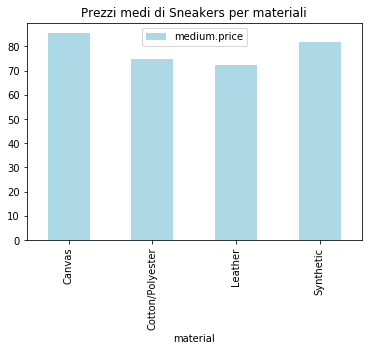

In [197]:
import matplotlib.pyplot as plot



v.plot.bar(title="Prezzi medi di Sneakers per materiali", color='lightblue')

plot.show(block=True)

__Proposta di interpretazione dati: un'analisi più da vicino sul tipo di scarpa "sneakers" svela che la nostra ambizione nel voler proporre un articolo di costo medio, competitivo ma di qualità, è giustificato dall'attuale offerta di mercato. Il canvas offre un'elevato rapporto qualità prezzo rispetto materiali sintetici e misti, e si propone come alternativa "vegana" ai prodotti fabbricati con derivati animali, con un incremento di prezzo rispetto a ques'ultimi che rappresentano la qualità a il valore aggiunto che siamo convinti i nostri consumatori saranno felici di pagare (ecc ecc bla bla)__

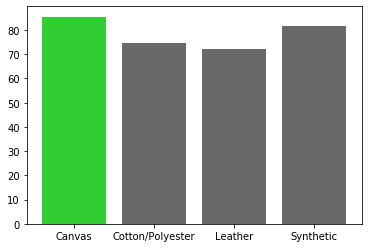

In [200]:
height = [85.48000, 74.69000, 72.35900, 81.73625]
bars = ('Canvas', 'Cotton/Polyester', 'Leather', 'Synthetic')
y_pos = np.arange(len(bars))

plot.bar(y_pos, height, color=['limegreen', 'dimgrey', 'dimgrey', 'dimgrey'])
plot.xticks(y_pos, bars)
plot.show()




__nota, se avete richieste per i colori dei grafici li abbiamo imparati!!! fateci sapere__

__prezzi minimi e massimi per articoli e materiali__

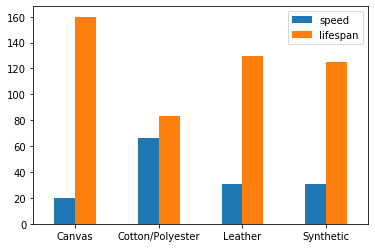

In [206]:
speed = [19.99, 66.39, 30.99, 30.99]
lifespan = [160.00, 82.99, 129.95, 124.99]
bars = ['Canvas', 'Cotton/Polyester', 'Leather', 'Synthetic']
p = pd.DataFrame({'speed': speed,
                   'lifespan': lifespan}, index=index)
ax = p.plot.bar(rot=0)